# PCA Examples

Let's start with our implementations.

In [0]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [0]:
def scratch_PCA(X, k):
  demeaned_X= X - np.mean(X, axis=0)
  #we now have to caculate the covariance matrix
  cov_X= np.matmul(np.transpose(demeaned_X), demeaned_X)
  sigma,V= np.linalg.eig(cov_X)
  # you then select the k biggest eignevalues and their corresponding eigenvectors
  return sigma[:k], V[:k]

In [0]:
def sklearn_PCA(X, k):
  # initialize pca with num of components (k)
  pca = PCA(n_components=k)

  # run pca on our data set
  pca.fit(X)

  # get our first k components from our solutions
  variance = pca.explained_variance_[:k]
  vectors = pca.components_[:k]
  vectors = [np.asarray(vectors[i]) for i in range(len(vectors))]

  return variance, vectors

We use a standard dataset (Iris) included with scikit-learn 


In [0]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
iris_df = pd.read_csv(url, names=['sepal length','sepal width','petal length',
                                  'petal width','target'])

iris_df.head()

sepal length  sepal width  petal length  petal width       target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [0]:
# extract our data and labels
X = iris_df.loc[:, features].values
y = iris_df.loc[:,['target']].values
X = StandardScaler().fit_transform(X)

The dataset (iris) comes with several *features* and a target, which  
corresponds to the classification for the row with the given values for each  
feature.

For PCA we just look at the features to determine the directions of maximum  
variance, and then we can use our principal components to map back to the  
targets.

Another important note: we use standard scaler on our input X as PCA is not  
scale invariant. In other words, by scaling all values by the same factor, our  
results may change. Example as follows:

### Effect of Scale on PCA:

In [0]:
scale_ex = np.array([[1,-5],[-3,-8],[7, -3]])
scale_ex

array([[ 1, -5],
       [-3, -8],
       [ 7, -3]])

In [0]:
sklearn_PCA(scale_ex, 2)

(array([31.40128474,  0.26538192]),
 [array([0.89728145, 0.44145894]), array([-0.44145894,  0.89728145])])

In [0]:
sklearn_PCA(2*scale_ex, 2)

(array([125.60513897,   1.06152769]),
 [array([0.89728145, 0.44145894]), array([-0.44145894,  0.89728145])])

As we see above, the amount of variance captured by the first principal  
component is not scaled by 2, but by the scalar squared.

### Back to the iris dataset:

After we obtain the principal components, we project the original data using  
the principal component vectors.

This projection demonstrates why PCA is dimension reductionality:

In [0]:
variance, pc = sklearn_PCA(X, 2)
projected = np.matmul(X, np.transpose(np.asarray(pc)))
principalDf = pd.DataFrame(data = projected
             , columns = ['principal component 1', 'principal component 2'])
# add back the target
finalDf = pd.concat([principalDf, iris_df[['target']]], axis = 1)

## Visualization

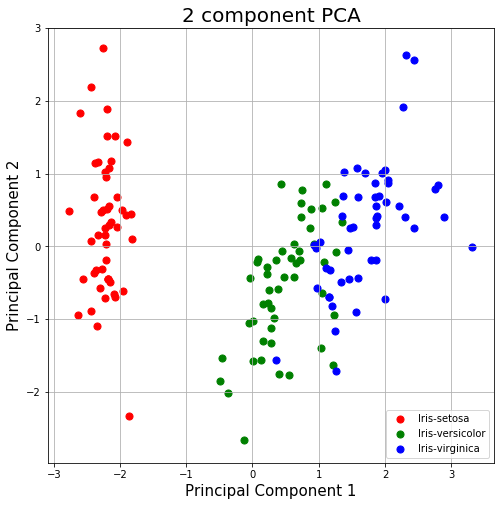

In [0]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [0]:
print("Variance explained by Principal Component 1: " + str(variance[0]))
print("Variance explained by Principal Component 2: " + str(variance[1]))

Variance explained by Principal Component 1: 2.930353775589314
Variance explained by Principal Component 2: 0.9274036215173412


As we see above, by using the first 2 principal components, we were able to  
compress our dataset with 4 initial variables/features, into 2 features and  
visualize it on a simple plot. We also see how variance factors into the split  
of the principal components. The first principal component shows the best split  
between the data, and very clearly sets apart the two plant species, despite  
the PCA being carried out on data without any labels (knowledge of which  
species a row belongs to). Accordingly, the first principal component also  
captures the most variance of the original dataset.

Credit:

Visualization: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60